In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-data-set/diabetes.csv


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [ ]:
df = pd.read_csv('../input/diabetes-data-set/diabetes.csv')
df.shape

(768, 9)

In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Basic EDA
1. Null values
2. Unbalanced data set
3. Distribution of variables
4. Looking for Outliars  

In [ ]:
# Cheching for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

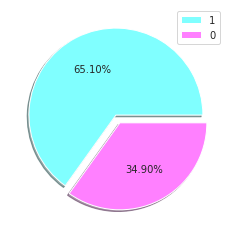

In [ ]:
# Check target balance
targetBalance = df['Outcome'].value_counts()/df.shape[0]
plt.pie(targetBalance, autopct='%1.2f%%', explode=[0, 0.1], shadow=True, colors=[[0.5, 1, 1],[1, 0.5,1]])
plt.legend({'0','1'}, loc='upper right')

### Reasonably balanced dataset

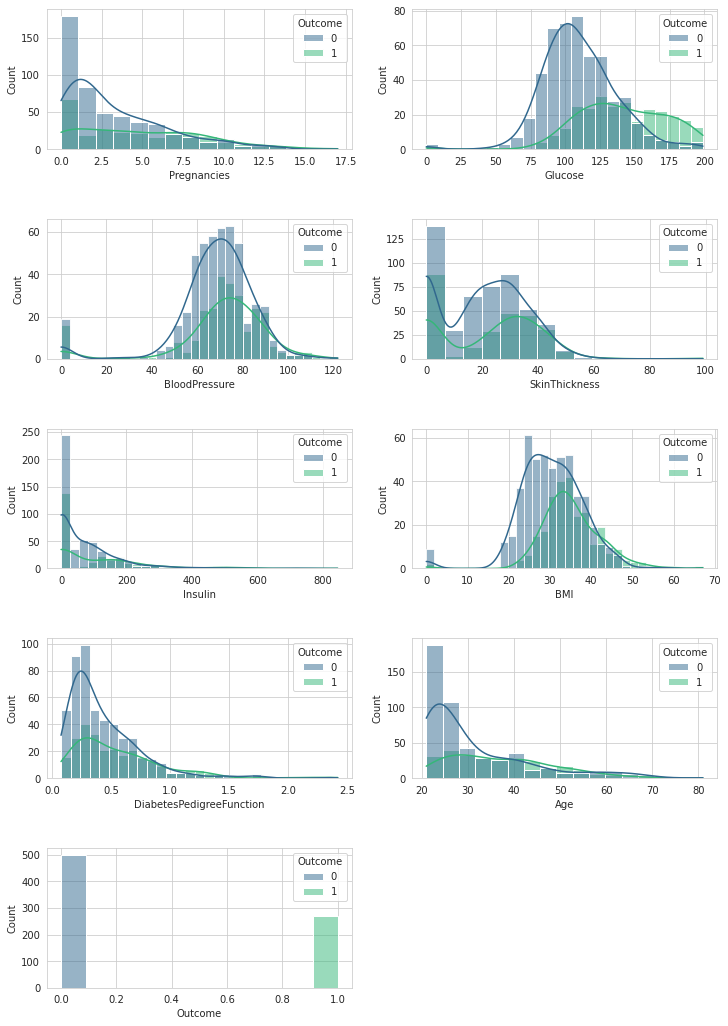

In [ ]:
plt.figure(figsize=(12,18))
plt.subplots_adjust(hspace=0.5)
i = 1
for col_name in df.columns:
    plt.subplot(5,2,i)
    sns.histplot(data=df, x=col_name, kde=True, hue='Outcome', multiple='layer', alpha=0.5, palette='viridis')
    i += 1

### Observation
Glucose value, Bloodpressure, Skinthickness, Insulin, BMI cannot be zero.

In [ ]:
nonzero_feature = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

df[nonzero_feature] = df[nonzero_feature].replace(0,np.nan)

In [ ]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

# Is there Outliers here before imputation?
    It will help to select the imputation strategy

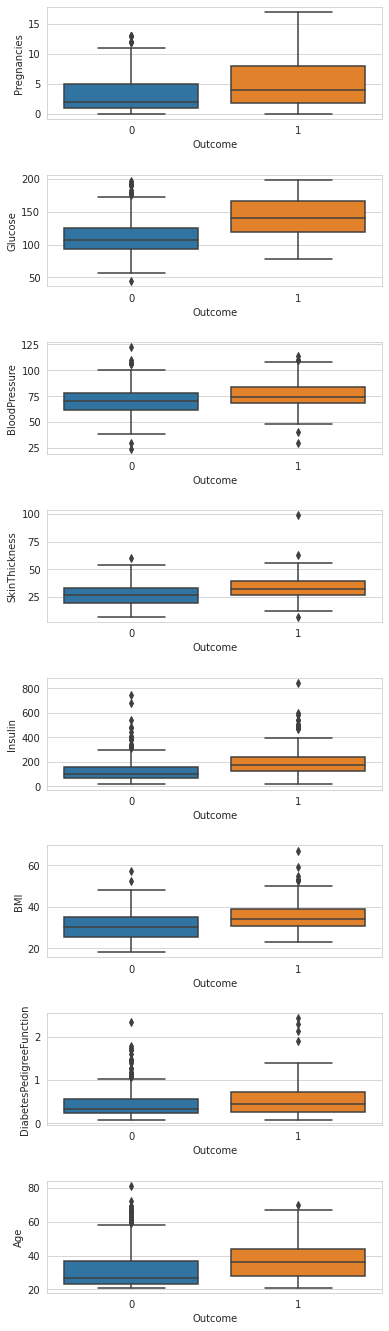

In [ ]:
plt.figure(figsize=(6,36))
plt.subplots_adjust(hspace=0.5)

i = 1
for col_name in df.columns.drop('Outcome'):
    plt.subplot(12,1,i)
    sns.boxplot(data=df, x='Outcome', y=col_name)
    i +=1

Is there outliers? Is there extreme outliers?

In [ ]:
iqr = df.quantile(0.75) - df.quantile(0.25)
lower = df.quantile(0.25) - 1.5*iqr
upper = df.quantile(0.75) + 1.5*iqr

print("Number of outliers")
((df < lower) + (df > upper)).sum()

Number of outliers


Pregnancies                  4
Glucose                      0
BloodPressure               14
SkinThickness                3
Insulin                     24
BMI                          8
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64

In [ ]:
iqr = df.quantile(0.75) - df.quantile(0.25)
lower = df.quantile(0.25) - 3*iqr
upper = df.quantile(0.75) + 3*iqr

print("Number of extreme outliers")
((df < lower) + (df > upper)).sum()

Number of extreme outliers


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               1
Insulin                     8
BMI                         1
DiabetesPedigreeFunction    6
Age                         0
Outcome                     0
dtype: int64

### Observation
    There are extreme outliers in the data

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Outcome', axis = 1)
Y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101, shuffle=True)

## Imputation of dataset with median as there are outliers

In [ ]:
from sklearn.impute import SimpleImputer
simple_imputer = SimpleImputer(strategy='median')

# columns = [col for col in df.columns.drop('Outcome') if sum()]
cols_nan = df.columns[df.isnull().sum() > 0]

X_train[cols_nan] = simple_imputer.fit_transform(X_train[cols_nan])
X_test[cols_nan] = simple_imputer.transform(X_test[cols_nan])
df[cols_nan] = simple_imputer.transform(df[cols_nan])

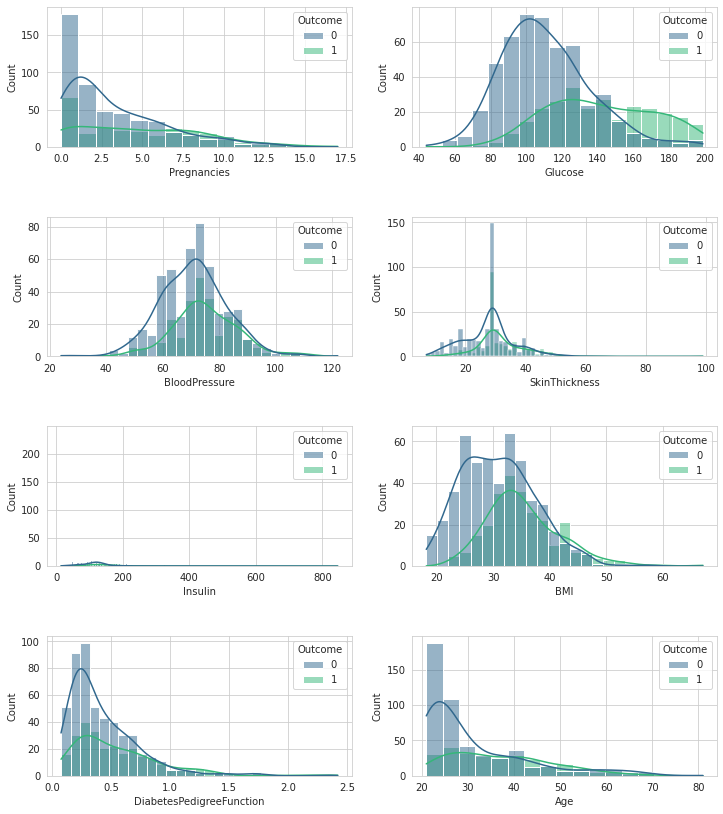

In [ ]:
plt.figure(figsize=(12,18))
plt.subplots_adjust(hspace=0.5)
i = 1
for col_name in df.columns.drop('Outcome'):
    plt.subplot(5,2,i)
    sns.histplot(data=df, x=col_name, kde=True, hue='Outcome', multiple='layer', alpha=0.5, palette='viridis')
    i += 1

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

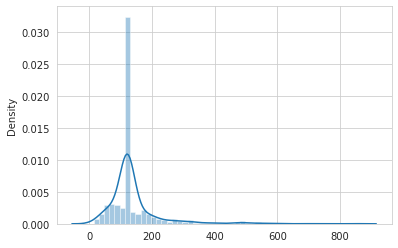

In [ ]:
sns.distplot(x=df['Insulin'])

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Feature selection 1 (overkill in this case)
---
1. Correlation
2. extra trees classifier
3. mutual_info_classif
4. chi2 with k-best

## Observation from correlation
1. Glucose, BMI, Age, Pregenancies, Skin thikness and Insulin are the most correlated to outcome.
2. Age and pregnancies are correlated and so is the BMI and skinThikness.

Outcome                     1.000000
Glucose                     0.492742
BMI                         0.311966
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.202428
DiabetesPedigreeFunction    0.173844
BloodPressure               0.165723
Name: Outcome, dtype: float64

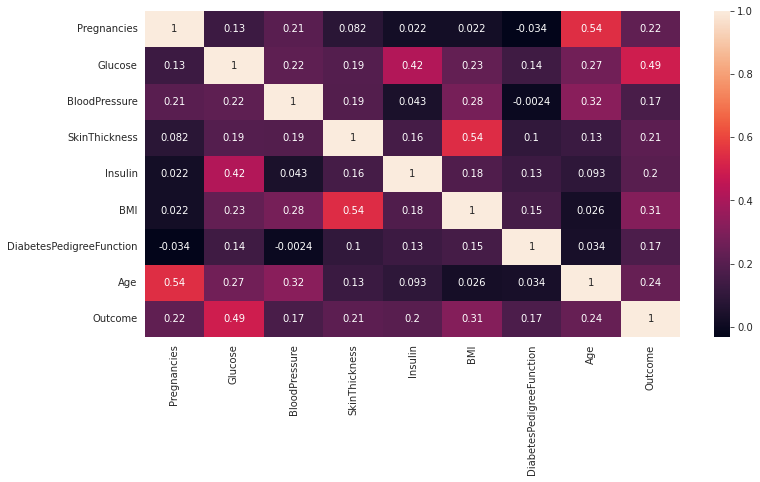

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)
df.corr()['Outcome'].sort_values(ascending=False)